<center> <h1>Module 6 - Multiple Linear Regression Additional Variable Types </h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

In [22]:
# load packages here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm

## Data and Description

What determines how much you get paid? The answer to this question varies from company to company because different companies have different salary guidelines. One company decided to investigate the salary differentials in its computer department. The Salary data set contains the following measurements:

Variable   | Description
---------- | -------------
Salary     | Quarterly salary of the employee
Experience | Number of years of experience of the employee
Education  | Level of education (HS = High School, BS = Bachelors, and BS+ = Advanced Degree)
Manager    | Is the employee a manager (Yes or No)

According to company policy, the experience, education, and manager status of an employee should (almost completely) determine the employee’s salary.

Do the following:

1. Download the "Salary.txt" file from Canvas and put it in the same folder as this file.
2. Read in the data set and call it "salary".

In [2]:
salary = pd.read_table("Salary.txt", delimiter = ' ')
salary.head()

,Salary,Experience,Education,Manager
0,13876,1,HS,Yes
1,11608,1,BS+,No
2,18701,1,BS+,Yes
3,11283,1,BS,No
4,11767,1,BS+,No


In [3]:
print(salary.dtypes)

Salary         int64
Experience     int64
Education     object
Manager       object
dtype: object


## Explore the Data (EDA)

### Explore the distribution of the categorical variables.

In [4]:
salary['Education'].value_counts()

Education
BS     18
HS     14
BS+    13
Name: count, dtype: int64

In [5]:
salary['Manager'].value_counts()

Manager
No     26
Yes    19
Name: count, dtype: int64

### Create a scatterplot matrix (using the continuous variables only).

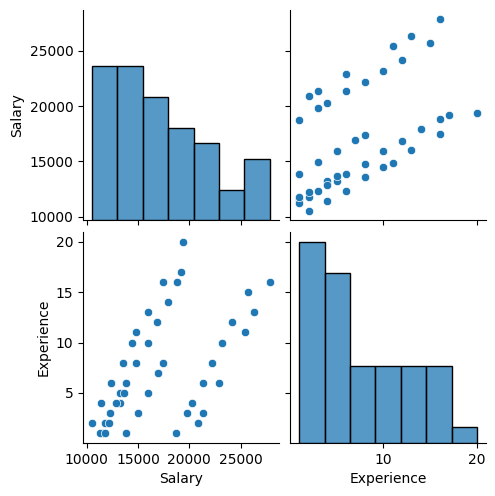

In [6]:
sns.pairplot(salary)

### Plot Salary vs Experience

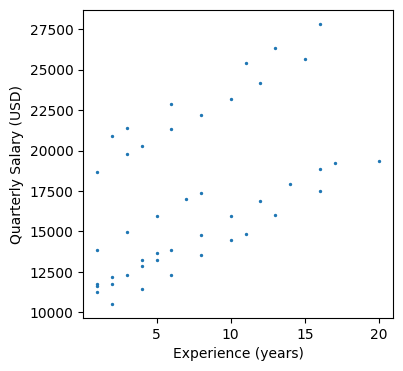

In [7]:
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = salary['Experience'], 
            y = salary['Salary'],
            s = 2)
plt.xlabel("Experience (years)")
plt.ylabel("Quarterly Salary (USD)")
plt.show()

### Plot Salary vs Education

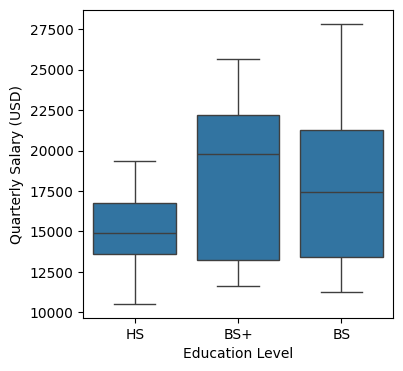

In [8]:
plt.figure(figsize = (4, 4))
sns.boxplot(x = 'Education', 
            y = 'Salary', 
            data = salary)
plt.xlabel('Education Level')
plt.ylabel('Quarterly Salary (USD)')
plt.show()

### Plot Salary vs Manager

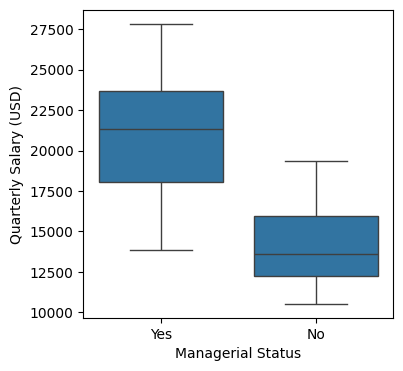

In [9]:
plt.figure(figsize = (4, 4))
sns.boxplot(x = 'Manager', 
            y = 'Salary', 
            data = salary)
plt.xlabel('Managerial Status')
plt.ylabel('Quarterly Salary (USD)')
plt.show()

### Create a color- and shape-coded scatterplot comparing all variables

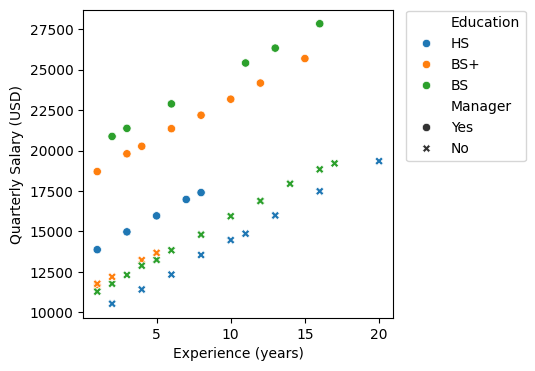

In [10]:
plt.figure(figsize = (4, 4))
sns.scatterplot(data = salary, 
                x = 'Experience', 
                y = 'Salary', 
                hue = 'Education', 
                style = 'Manager')
plt.xlabel('Experience (years)')
plt.ylabel('Quarterly Salary (USD)')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

### Create interaction plots to determine if including an Education/Manager interaction makes sense.

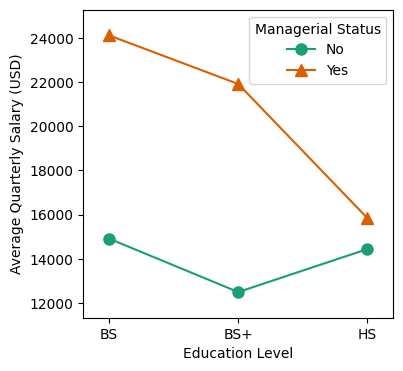

In [11]:
fig, ax = plt.subplots(figsize = (4, 4))
fig = interaction_plot(x = salary["Education"],
                       trace = salary["Manager"],
                       response = salary["Salary"],
                       colors = ["#1b9e77", "#d95f02"],
                       markers = ["o", "^"],
                       ms = 8,  # marker size
                       ax = ax)
ax.set_xlabel('Education Level')
ax.set_ylabel('Average Quarterly Salary (USD)')
ax.legend(title = 'Managerial Status')
plt.show()

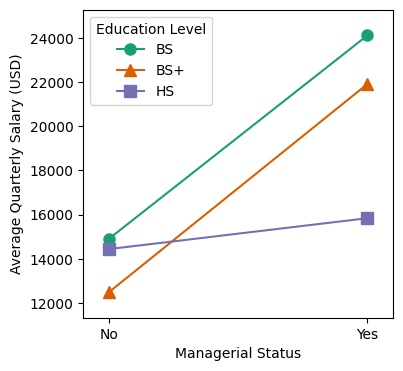

In [12]:
fig, ax = plt.subplots(figsize = (4, 4))
fig = interaction_plot(x = salary["Manager"],
                       trace = salary["Education"],
                       response = salary["Salary"],
                       colors = ["#1b9e77", "#d95f02", "#7570b3"],
                       markers = ["o", "^", "s"],
                       ms = 8,  # marker size
                       ax = ax)
ax.set_xlabel('Managerial Status')
ax.set_ylabel('Average Quarterly Salary (USD)')
ax.legend(title = 'Education Level')

## Multiple Linear Regression

### To start, you will need to code the categorical variables to dummy/indicator variables. Create dummy/indicator variables for ALL levels of Education and Manager.

In [29]:
salary_dummy = pd.get_dummies(salary,
                              columns = ['Education', 'Manager']).astype(int)
salary_dummy.head()

,Salary,Experience,Education_BS,Education_BS+,Education_HS,Manager_No,Manager_Yes
0,13876,1,0,0,1,0,1
1,11608,1,0,1,0,1,0
2,18701,1,0,1,0,0,1
3,11283,1,1,0,0,1,0
4,11767,1,0,1,0,1,0


### Fit an (inappropriate) over-paramterized multiple linear regression model to the data by using ALL indicator variables in the model. What does Python do (hint: Look at "Note [2]")?

In [26]:
y = salary_dummy['Salary']
X_full = sm.add_constant(salary_dummy[['Experience', 
                                       'Education_HS', 'Education_BS', 'Education_BS+', 
                                       'Manager_No', 'Manager_Yes']])
mod_full = sm.OLS(y, X_full)
res_full = mod_full.fit()
res_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     211.7
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           2.45e-26
Time:                        14:25:10   Log-Likelihood:                -373.79
No. Observations:                  45   AIC:                             757.6
Df Residuals:                      40   BIC:                             766.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7375.2196    150.419     49.031      0.000    7071.212    7679.228
Experience      545.7855     30.912     17.656      0.000     483.311     608.260
Education_HS    415.4153    238.145      1.744      0.089     -65.893     896.724
Education_BS   3544.9439    223.590     15.855      0.000    3093.053    3996.835
Education_BS+  3414.8604    239.400     14.264      0.000    2931.016    3898.705
Manager_No      254.1170    173.707      1.463      0.151     -96.958     605.192
Manager_Yes    7121.1026    183.369     38.835      0.000    6750.501    7491.704
==============================================================================
Omnibus:                        2.511   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.400
Skew:                          -0.044   Prob(JB):                        0.496
Kurtosis:                       2.140   Cond. No.                     1.23e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.46e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Fit a more appropriate multiple linear regression model to the data with "HS" as the baseline level for Education and "No" as the baseline level for Manager. 

In [28]:
y = salary_dummy['Salary']
X = sm.add_constant(salary_dummy[['Experience', 
                                  'Education_BS', 'Education_BS+', 
                                  'Manager_Yes']])
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     211.7
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           2.45e-26
Time:                        14:25:23   Log-Likelihood:                -373.79
No. Observations:                  45   AIC:                             757.6
Df Residuals:                      40   BIC:                             766.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8044.7518    392.781     20.482      0.000    7250.911    8838.592
Experience      545.7855     30.912     17.656      0.000     483.311     608.260
Education_BS   3129.5286    370.470      8.447      0.000    2380.780    3878.277
Education_BS+  2999.4451    416.712      7.198      0.000    2157.238    3841.652
Manager_Yes    6866.9856    323.991     21.195      0.000    6212.175    7521.796
==============================================================================
Omnibus:                        2.511   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.400
Skew:                          -0.044   Prob(JB):                        0.496
Kurtosis:                       2.140   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the fitted model.

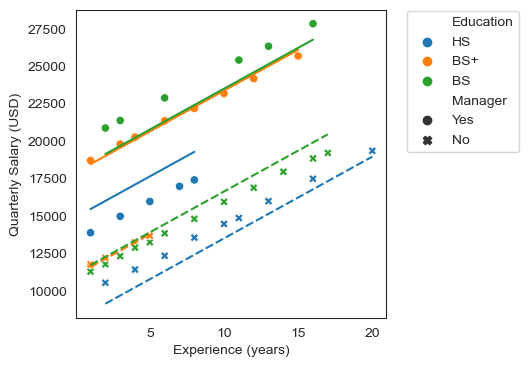

In [16]:
sns.set_style("white")
plt.figure(figsize = (4, 4))
sns.scatterplot(data = salary, 
                x = 'Experience', 
                y = 'Salary', 
                hue = 'Education', 
                style = 'Manager')
sns.lineplot(x = salary['Experience'],
             y = res.fittedvalues,
             hue = salary['Education'], 
             style = salary['Manager'], 
             legend = False)
plt.xlabel('Experience (years)')
plt.ylabel('Quarterly Salary (USD)')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

### Create a confidence interval for the average Salary for a manager with a BS education and 10 years experience. Your interval should match the one in the course notes.

In [17]:
pred = res.get_prediction([1, 10, 1, 0, 1])
pred.summary_frame(alpha = 0.05).iloc[:, [0, 2, 3]]

,mean,mean_ci_lower,mean_ci_upper
0,23499.121006,22829.882372,24168.359639


### Create a prediction interval for the Salary of a manager with a BS education and 10 years experience. Your interval should match the one in the course notes.

In [18]:
pred = res.get_prediction([1, 10, 1, 0, 1])
pred.summary_frame(alpha = 0.05).iloc[:, [0, 4, 5]]

,mean,obs_ci_lower,obs_ci_upper
0,23499.121006,21294.504343,25703.737668


### Now fit a multiple linear regression model to the data that includes the interaction between Education and Manager. The coefficients should match the ones in the course notes.

In [19]:
salary_dummy['EduBS_ManY'] = salary_dummy['Education_BS'] * salary_dummy['Manager_Yes']
salary_dummy['EduBS+_ManY'] = salary_dummy['Education_BS+'] * salary_dummy['Manager_Yes']

y = salary_dummy['Salary']
X_inter = sm.add_constant(salary_dummy[['Experience', 
                                        'Education_BS', 'Education_BS+', 
                                        'Manager_Yes',
                                        'EduBS_ManY',
                                        'EduBS+_ManY']])
mod_inter = sm.OLS(y, X_inter)
res_inter = mod_inter.fit()
res_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.30e-69
Time:                        11:36:20   Log-Likelihood:                -249.34
No. Observations:                  45   AIC:                             512.7
Df Residuals:                      38   BIC:                             525.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9458.3778     31.041    304.709      0.000    9395.539    9521.216
Experience      498.4178      2.152    231.640      0.000     494.062     502.774
Education_BS   1384.2937     29.858     46.362      0.000    1323.849    1444.739
Education_BS+  1741.3359     40.683     42.803      0.000    1658.979    1823.693
Manager_Yes    3988.8169     39.073    102.085      0.000    3909.717    4067.917
EduBS_ManY     5049.2939     51.668     97.727      0.000    4944.699    5153.889
EduBS+_ManY    3051.7633     57.674     52.914      0.000    2935.008    3168.519
==============================================================================
Omnibus:                        1.462   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.171
Skew:                           0.177   Prob(JB):                        0.557
Kurtosis:                       2.293   Cond. No.                         78.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We would like to test if the overall interaction between Education and Manager is significant. To do this, use the `anova_lm` function from statsmodels and input the model you created without interactions and the model you just created (with interactions).

In [20]:
anova_lm(res, res_inter)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,40.0,4.320910e+07,0.0,NaN,NaN,NaN
1,38.0,1.711881e+05,2.0,4.303791e+07,4776.734853,2.291239e-46


### Plot the fitted model that includes the interaction between Education and Manager.

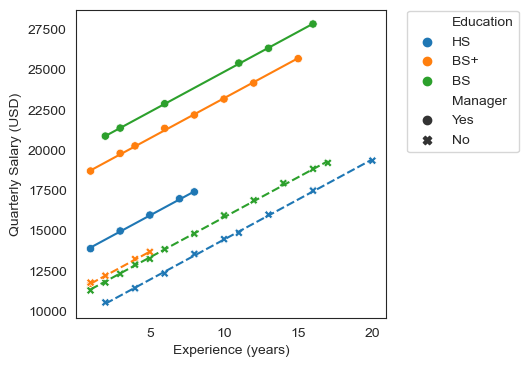

In [21]:
plt.figure(figsize = (4, 4))
sns.scatterplot(x = salary['Experience'],
                y = salary['Salary'],
                hue = salary['Education'], 
                style = salary['Manager'])
sns.lineplot(x = salary['Experience'],
             y = res_inter.fittedvalues,
             hue = salary['Education'],
             style = salary['Manager'], 
             legend = False)
plt.xlabel('Experience (years)')
plt.ylabel('Quarterly Salary (USD)')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

## Summary and Conclusions

Through our analyses, we learned that the effect of managerial level on salary depended on education level. We learned how to work with categorical variables and interaction variables to produce an appropriate model for this data set. Please note that you should now take your final model and check to make sure all assumptions are met before proceeding.